In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os

# Fit only one SED

In [3]:
from pyGRBz.pyGRBz import GRB_photoZ

In [4]:
# Load module
photoz = GRB_photoZ(output_dir=os.getenv('pyGRBz_DIR')+'/pyGRBz/results/Tuto/SED/')

In [5]:
# Load the GRB SED stored in data/sed/
photoz.load_data(data_dir='data/sed/',data_name=['GRB050904'])


Observations:
    Name   time_since_burst band  mag  mag_err  zp phot_sys detection telescope
--------- ---------------- ---- ----- ------- --- -------- --------- ---------
GRB050904                1   Ks  20.0    0.07   -       AB         1     isaac
GRB050904                1    H 20.37    0.07   -       AB         1     isaac
GRB050904                1    J  20.7    0.06   -       AB         1     isaac
GRB050904                1    z  21.8     0.2   -       AB         1     fors2
GRB050904                1    I 24.45     0.2   -       AB         1     fors2
GRB050904                1    R  23.9    0.05   -       AB         0     cafos
GRB050904                1    V  24.6    0.05   -       AB         0     laica


Info about data:
    name   type  RA_J2000   DEC_J2000   ... beta_inf beta_X beta_X_sup beta_X_inf
--------- ---- ---------- ------------ ... -------- ------ ---------- ----------
GRB050904  sed 0h54m50.6s +14d05m04.5s ...      0.3    -99        -99        -99



In [6]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


Reddening along the line of sight of GRB050904: E(B-V) = 0.052

Galactic extinction in band isaac K: 0.019 AB mag
Galactic extinction in band isaac H: 0.029 AB mag
Galactic extinction in band isaac J: 0.046 AB mag
Galactic extinction in band fors2 z: 0.064 AB mag
Galactic extinction in band fors2 I: 0.098 AB mag
Galactic extinction in band cafos R: 0.136 AB mag
Galactic extinction in band laica V: 0.163 AB mag

SEDS formatted:
    Name   time_since_burst band ...      flux          flux_err   
                                ...    microJy         microJy    
--------- ---------------- ---- ... -------------- ---------------
GRB050904                1    V ... 0.609843486144 0.0280843304051
GRB050904                1    R ...  1.13347824021 0.0521986019826
GRB050904                1    I ... 0.659613328557  0.121505265398
GRB050904                1    z ...  7.34040013708   1.35215167458
GRB050904                1    J ...  19.8795384088    1.0985838911
GRB050904                1    H

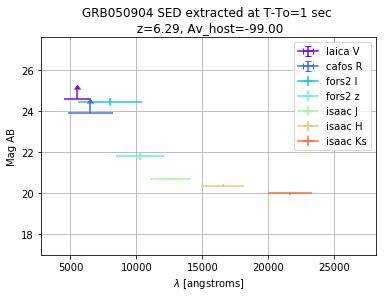


SEDS:
    Name   time_since_burst band  mag  mag_err
--------- ---------------- ---- ----- -------
GRB050904                1    V  24.6    0.05
GRB050904                1    R  23.9    0.05
GRB050904                1    I 24.45     0.2
GRB050904                1    z  21.8     0.2
GRB050904                1    J  20.7    0.06
GRB050904                1    H 20.37    0.07
GRB050904                1   Ks  20.0    0.07



In [7]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#a.extract_sed(model='BPL',method='fixed',time_SED=70)

In [8]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,2],beta=[0,2],norm=[0,10])



Fit 1/1 	 Object: GRB050904 

z_lit: 6.29   Av_lit: -99.00
Running burn-in
Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02

Best fit:
z: 6.208  Av: 0.420  beta: 0.014  Norm: 2.109     chi2: 8.168

Mean Proba: 3.92e-03

Sum Proba: 8.23e+01
Mean acceptance fraction: 0.476


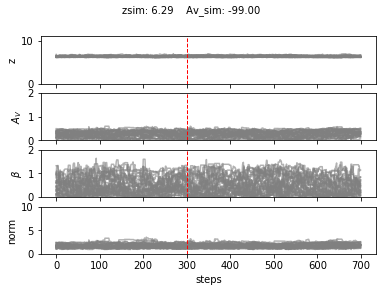

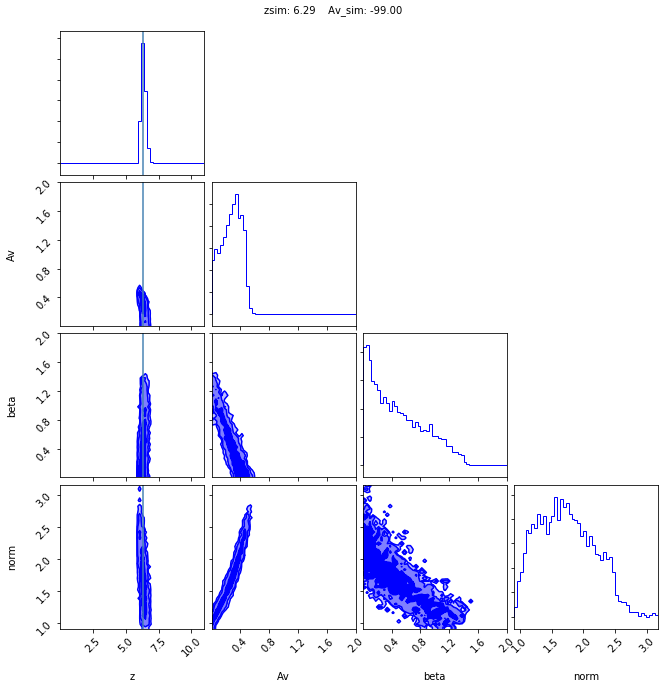


68% - 1 sigma:
z:6.295 +0.208 -0.138 
Av:0.286 +0.134 -0.174 
beta: 0.409 +0.513 -0.316 
norm: 1.699 +0.510 -0.443

95% - 2 sigmas:
z:6.295 +0.386 -0.209 
Av:0.286 +0.199 -0.267 
beta: 0.409 +0.864 -0.396 
norm: 1.699 +0.858 -0.668

99% - 3 sigmas:
z:6.295 +0.559 -0.266 
Av:0.286 +0.274 -0.285 
beta: 0.409 +1.034 -0.408 
norm: 1.699 +1.396 -0.754
median values PDF: 6.295 0.286 0.409 1.699
best fit: 6.208 0.420 0.014 2.109


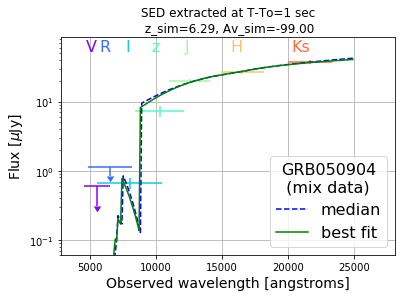


List of GRB not detected: []

None


In [9]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'


photoz.fit(ext_law='smc',Nthreads=4,sampler_type='ensemble',nwalkers=30,Nsteps1=300,Nsteps2=1000,nburn=300,
      Host_dust=True,Host_gas=False,MW_dust=False,MW_gas=False,DLA=False,igm_att='Meiksin',
      clean_data=False,plot_all=False,plot_deleted=False,priors=priors)

# Fit only one Light Curve

In [10]:
from pyGRBz.pyGRBz import GRB_photoZ

In [11]:
# Load module
photoz = GRB_photoZ(output_dir=os.getenv('pyGRBz_DIR')+'/pyGRBz/results/Tuto/LC/')

In [13]:
# Load the same GRB but with its light curve stored in data/lc/
photoz.load_data(data_dir='data/lc/',data_name=['GRB050904'])


Observations:
    Name   time_since_burst band  mag  mag_err  zp phot_sys detection telescope
--------- ---------------- ---- ----- ------- --- -------- --------- ---------
GRB050904          97200.0   Ks 18.24    0.07   -     vega         1     isaac
GRB050904         185414.4   Ks 19.12    0.07   -     vega         1     isaac
GRB050904          95385.6    H 19.09    0.07   -     vega         1     isaac
GRB050904         183600.0    H 19.96    0.07   -     vega         1     isaac
GRB050904          88905.6    J 19.58    0.14   -     vega         1      nics
GRB050904          93916.8    J 19.92    0.04   -     vega         1     isaac
GRB050904         180748.8    J 20.75    0.07   -     vega         1     isaac
GRB050904         268185.6    J 21.66    0.08   -     vega         1     isaac
GRB050904         359596.8    J 21.91    0.08   -     vega         1     isaac
GRB050904         459388.8    J 22.45    0.19   -     vega         1     isaac
GRB050904         620611.2    J  23.

In [14]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


Reddening along the line of sight of GRB050904: E(B-V) = 0.052

Galactic extinction in band isaac K: 0.019 AB mag
Galactic extinction in band isaac K: 0.019 AB mag
Galactic extinction in band isaac H: 0.029 AB mag
Galactic extinction in band isaac H: 0.029 AB mag
Galactic extinction in band nics J: 0.045 AB mag
Galactic extinction in band isaac J: 0.046 AB mag
Galactic extinction in band isaac J: 0.046 AB mag
Galactic extinction in band isaac J: 0.046 AB mag
Galactic extinction in band isaac J: 0.046 AB mag
Galactic extinction in band isaac J: 0.046 AB mag
Galactic extinction in band isaac J: 0.046 AB mag
Galactic extinction in band wfc z: 0.081 AB mag
Galactic extinction in band fors2 z: 0.064 AB mag
Galactic extinction in band cafos I: 0.089 AB mag
Galactic extinction in band cafos I: 0.089 AB mag
Galactic extinction in band cafos I: 0.089 AB mag
Galactic extinction in band fors2 I: 0.098 AB mag
Galactic extinction in band cafos R: 0.136 AB mag
Galactic extinction in band laica V: 0

FCN = 0.2959570003155169 
 TOTAL NCALL = 46 
 NCALLS = 46 
 
 
 EDM = 2.2277055151900922e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,4.60622,1,0,0,,,FIXED
2,t0,77068.8,1,0,0,0.0,,FIXED
3,norm,1.0344,0.171119,0,0,0.1,10.0,
4,alpha,2.48554,1.31683,0,0,-10.0,10.0,


Valid Minimum: True 
Is the covariance matrix accurate: True


FCN = 2.137528617548808e-30 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 2.712402046858936e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,0.824477,1,0,0,,,FIXED
2,t0,84931.2,1,0,0,0.0,,FIXED
3,norm,1,0.275876,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False


FCN = 4.8326084590232046e-30 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 6.254547536377504e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,0.609258,1,0,0,,,FIXED
2,t0,104371,1,0,0,0.0,,FIXED
3,norm,1,0.165692,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False


FCN = 9.55502316164977e-30 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 7.01201875106097e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,7.3404,1,0,0,,,FIXED
2,t0,108000,1,0,0,0.0,,FIXED
3,norm,1,0.156497,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False


FCN = 7.51818203916857e-05 
 TOTAL NCALL = 41 
 NCALLS = 41 
 
 
 EDM = 7.517213841989534e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,24.4444,1,0,0,,,FIXED
2,t0,95385.6,1,0,0,0.0,,FIXED
3,norm,0.999636,0.0644781,0,0,0.1,10.0,
4,alpha,1.22247,0.139225,0,0,-10.0,10.0,


Valid Minimum: True 
Is the covariance matrix accurate: True


FCN = 11.12883570353144 
 TOTAL NCALL = 49 
 NCALLS = 49 
 
 
 EDM = 1.9044998925956583e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,17.7265,1,0,0,,,FIXED
2,t0,93916.8,1,0,0,0.0,,FIXED
3,norm,1.01826,0.0354001,0,0,0.1,10.0,
4,alpha,1.44438,0.0457659,0,0,-10.0,10.0,


Valid Minimum: True 
Is the covariance matrix accurate: True


FCN = 7.495564291967104e-08 
 TOTAL NCALL = 41 
 NCALLS = 41 
 
 
 EDM = 7.495463683616188e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,34.4299,1,0,0,,,FIXED
2,t0,97200,1,0,0,0.0,,FIXED
3,norm,1.00001,0.0644655,0,0,0.1,10.0,
4,alpha,1.25501,0.141171,0,0,-10.0,10.0,


Valid Minimum: True 
Is the covariance matrix accurate: True


FCN = 2.7880736184291513e-30 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 2.7124020302464477e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,0.962545,1,0,0,,,FIXED
2,t0,89683.2,1,0,0,0.0,,FIXED
3,norm,1,0.275876,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False


FCN = 1.2202271526560713e-29 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 1.0339150129317619e-15 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,23.6623,1,0,0,,,FIXED
2,t0,88905.6,1,0,0,0.0,,FIXED
3,norm,1,0.128901,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False


FCN = 2.4636358891555646e-30 
 TOTAL NCALL = 21 
 NCALLS = 21 
 
 
 EDM = 3.2423574631386874e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,F0,9.83006,1,0,0,,,FIXED
2,t0,88214.4,1,0,0,0.0,,FIXED
3,norm,1,0.230007,0,0,0.1,10.0,
4,alpha,1,15.3361,0,0,-10.0,10.0,


Valid Minimum: False 
Is the covariance matrix accurate: False
   name   telescope band ...     alpha        t0           chi2      
--------- --------- ---- ... ------------- -------- -----------------
GRB050904     cafos    I ... 2.48553836155  77068.8    0.295957000316
GRB050904     cafos    R ...           1.0  84931.2 2.13752861755e-30
GRB050904     fors2    I ...           1.0 104371.2 4.83260845902e-30
GRB050904     fors2    z ...           1.0 108000.0 9.55502316165e-30
GRB050904     isaac    H ... 1.22246857581  95385.6 7.51818203917e-05
GRB050904     isaac    J ... 1.44437822121  93916.8     11.1288357035
GRB050904     isaac   Ks ... 1.25501158609  97200.0 7.49556429197e-08
GRB050904     laica    V ...           1.0  89683.2 2.78807361843e-30
GRB050904      nics    J ...           1.0  88905.6 1.22022715266e-29
GRB050904       wfc    z ...           1.0  88214.4 2.46363588916e-30


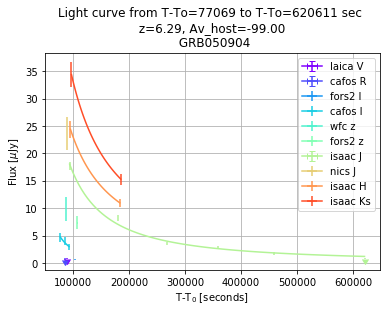

reddest band: Ks


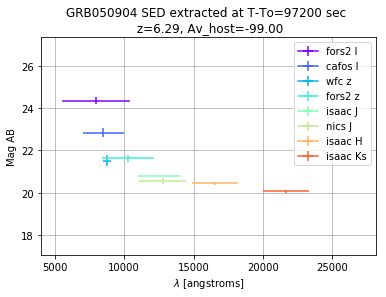


SEDS:
    Name   time_since_burst band      mag          mag_err    
                 s                                           
--------- ---------------- ---- ------------- ---------------
GRB050904          97200.0    I 24.3607108817  0.167632450331
GRB050904          97200.0    I 22.8311939064  0.215205150125
GRB050904          97200.0    z 21.5239263049  0.275465230167
GRB050904          97200.0    z  21.621306937           0.153
GRB050904          97200.0    J 20.8126856897 0.0412816535572
GRB050904          97200.0    J 20.5616993573   0.15306122449
GRB050904          97200.0    H 20.4549557818  0.071657250975
GRB050904          97200.0   Ks 20.0576444553 0.0699989717181



In [15]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#a.extract_sed(model='BPL',method='fixed',time_SED=70)

In [16]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,2],beta=[0,2],norm=[0,10])



Fit 1/1 	 Object: GRB050904 

z_lit: 6.29   Av_lit: -99.00
Running burn-in
Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02

Best fit:
z: 6.142  Av: 0.449  beta: 0.015  Norm: 2.272     chi2: 14.082

Mean Proba: 2.24e-04

Sum Proba: 4.71e+00
Mean acceptance fraction: 0.497


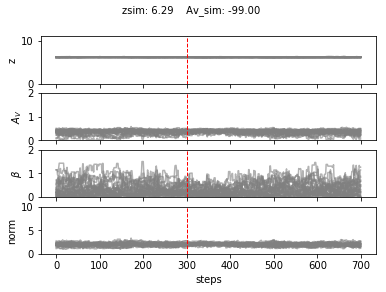

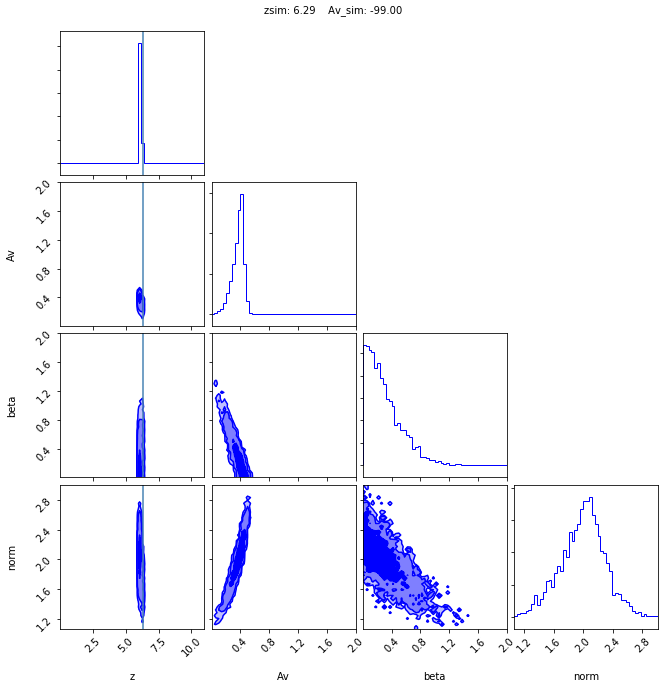


68% - 1 sigma:
z:6.122 +0.032 -0.036 
Av:0.380 +0.054 -0.098 
beta: 0.243 +0.303 -0.170 
norm: 2.011 +0.263 -0.321

95% - 2 sigmas:
z:6.122 +0.101 -0.049 
Av:0.380 +0.104 -0.214 
beta: 0.243 +0.658 -0.233 
norm: 2.011 +0.563 -0.648

99% - 3 sigmas:
z:6.122 +0.184 -0.099 
Av:0.380 +0.149 -0.329 
beta: 0.243 +1.075 -0.243 
norm: 2.011 +0.826 -0.879
median values PDF: 6.122 0.380 0.243 2.011
best fit: 6.142 0.449 0.015 2.272


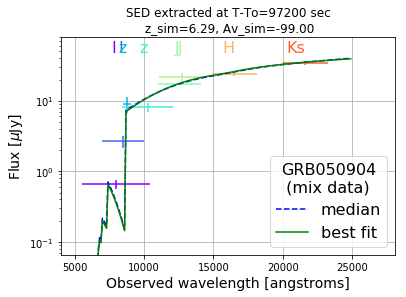


List of GRB not detected: []

None


In [17]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'


photoz.fit(ext_law='smc',Nthreads=4,sampler_type='ensemble', nwalkers=30,Nsteps1=300,Nsteps2=1000,nburn=300,
      Host_dust=True,Host_gas=False,MW_dust=False,MW_gas=False,DLA=False,igm_att='Meiksin',
      clean_data=False,plot_all=False,plot_deleted=False,priors=priors)

# Run code for multiple Targets

In [18]:
from pyGRBz.pyGRBz import GRB_photoZ

In [19]:
# Load module
photoz = GRB_photoZ(output_dir=os.getenv('pyGRBz_DIR')+'/pyGRBz/results/Tuto/MultipleTargets/')

In [20]:
# Load as many targets as you want. It can be a mix of SEDs and light curves
photoz.load_data(data_dir='data/sed/',           
            data_name=['GRB050904','GRB080825B','GRB080906'])

            #data_name=['GRB050904','GRB080825B','GRB080906','GRB080913','GRB080916C','GRB081228','GRB090423',
            #           'GRB090429B','GRB090516','GRB100518A','GRB110721A','GRB120712A','GRB120922A','GRB130215A',
            #           'GRB130327A','GRB130408A','GRB130514A','GRB130606A','GRB130907A','GRB130925A','GRB131117A',
            #           'GRB140419A','GRB140515A','GRB140518A','GRB140614A','GRB141109A','GRB150120B','GRB150910A',
            #           'GRB151027B','GRB160203A','GRB160327A','GRB160625B'])
            


Observations:
    Name    time_since_burst band  mag  ... phot_sys detection telescope ABcorr
---------- ---------------- ---- ----- ... -------- --------- --------- ------
 GRB050904                1   Ks  20.0 ...       AB         1     isaac     --
 GRB050904                1    H 20.37 ...       AB         1     isaac     --
 GRB050904                1    J  20.7 ...       AB         1     isaac     --
 GRB050904                1    z  21.8 ...       AB         1     fors2     --
 GRB050904                1    I 24.45 ...       AB         1     fors2     --
 GRB050904                1    R  23.9 ...       AB         0     cafos     --
 GRB050904                1    V  24.6 ...       AB         0     laica     --
GRB080825B            25920    g 22.45 ...       AB         1     grond  -99.0
GRB080825B            25920    r 19.91 ...       AB         1     grond  -99.0
GRB080825B            25920    i 18.62 ...       AB         1     grond  -99.0
GRB080825B            25920    z 18.

In [21]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


Reddening along the line of sight of GRB050904: E(B-V) = 0.052

Galactic extinction in band isaac K: 0.019 AB mag
Galactic extinction in band isaac H: 0.029 AB mag
Galactic extinction in band isaac J: 0.046 AB mag
Galactic extinction in band fors2 z: 0.064 AB mag
Galactic extinction in band fors2 I: 0.098 AB mag
Galactic extinction in band cafos R: 0.136 AB mag
Galactic extinction in band laica V: 0.163 AB mag

Reddening along the line of sight of GRB080825B: E(B-V) = 0.213

Galactic extinction in band grond g: 0.829 AB mag
Galactic extinction in band grond r: 0.575 AB mag
Galactic extinction in band grond i: 0.429 AB mag
Galactic extinction in band grond z: 0.319 AB mag
Galactic extinction in band grond J: 0.190 AB mag
Galactic extinction in band grond H: 0.120 AB mag
Galactic extinction in band grond K: 0.077 AB mag

Reddening along the line of sight of GRB080906: E(B-V) = 0.248

Galactic extinction in band grond g: 0.966 AB mag
Galactic extinction in band grond r: 0.671 AB mag
Gala

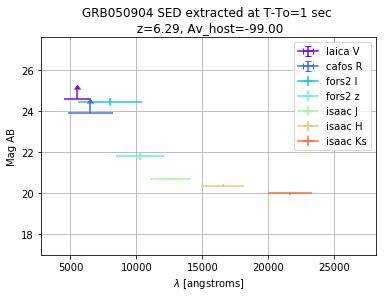

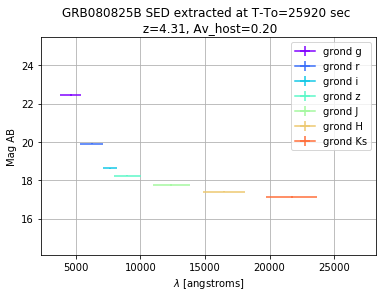

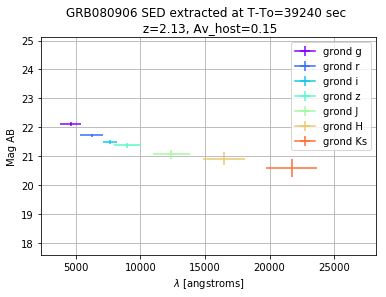


SEDS:
    Name    time_since_burst band      mag      mag_err
---------- ---------------- ---- ------------- -------
 GRB050904                1    V          24.6    0.05
 GRB050904                1    R          23.9    0.05
 GRB050904                1    I         24.45     0.2
 GRB050904                1    z          21.8     0.2
 GRB050904                1    J          20.7    0.06
 GRB050904                1    H         20.37    0.07
 GRB050904                1   Ks          20.0    0.07
GRB080825B            25920    g         22.45    0.07
GRB080825B            25920    r         19.91    0.04
GRB080825B            25920    i         18.62    0.04
GRB080825B            25920    z         18.24    0.04
GRB080825B            25920    J         17.74    0.04
GRB080825B            25920    H         17.41    0.05
GRB080825B            25920   Ks         17.11    0.05
 GRB080906            39240    g         22.11    0.07
 GRB080906            39240    r         21.72    0.05
 G

In [22]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#a.extract_sed(model='BPL',method='fixed',time_SED=70)

In [23]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,2],beta=[0,2],norm=[0,10])



Fit 1/3 	 Object: GRB050904 

z_lit: 6.29   Av_lit: -99.00
Running burn-in
Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02

Best fit:
z: 6.186  Av: 0.401  beta: 0.085  Norm: 2.048     chi2: 8.264

Mean Proba: 3.76e-03

Sum Proba: 7.89e+01
Mean acceptance fraction: 0.485


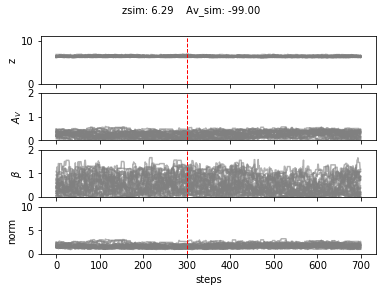

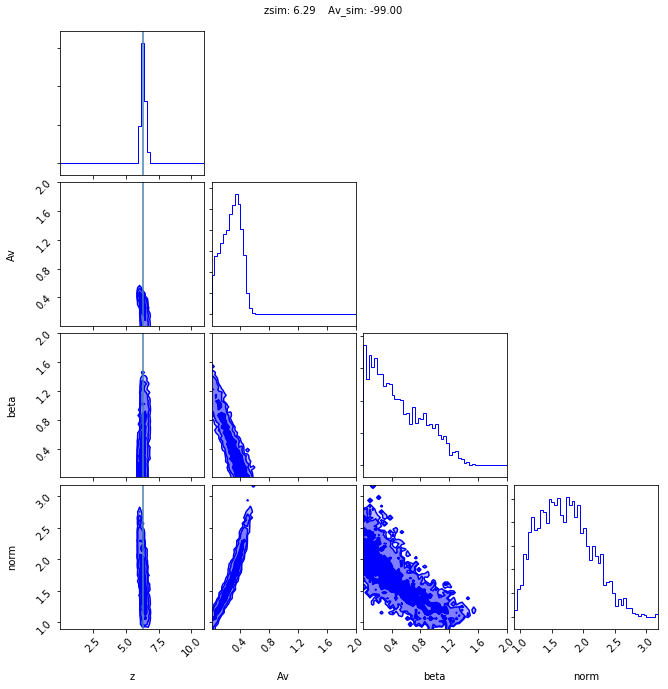


68% - 1 sigma:
z:6.287 +0.200 -0.129 
Av:0.283 +0.121 -0.163 
beta: 0.414 +0.486 -0.296 
norm: 1.678 +0.463 -0.415

95% - 2 sigmas:
z:6.287 +0.382 -0.200 
Av:0.283 +0.203 -0.256 
beta: 0.414 +0.836 -0.398 
norm: 1.678 +0.889 -0.635

99% - 3 sigmas:
z:6.287 +0.508 -0.249 
Av:0.283 +0.271 -0.280 
beta: 0.414 +1.051 -0.413 
norm: 1.678 +1.284 -0.733
median values PDF: 6.287 0.283 0.414 1.678
best fit: 6.186 0.401 0.085 2.048


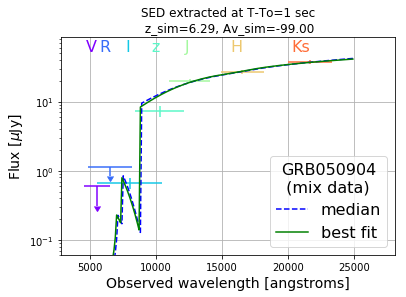



Fit 2/3 	 Object: GRB080825B 

z_lit: 4.31   Av_lit: 0.20
Running burn-in
Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02

Best fit:
z: 4.511  Av: 0.244  beta: 0.269  Norm: 1.345     chi2: 3.447

Mean Proba: 3.14e-02

Sum Proba: 6.59e+02
Mean acceptance fraction: 0.484


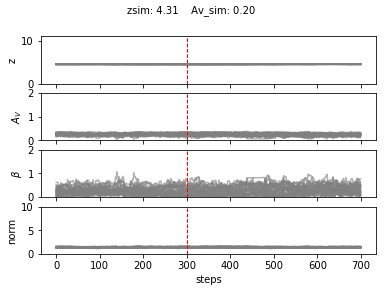

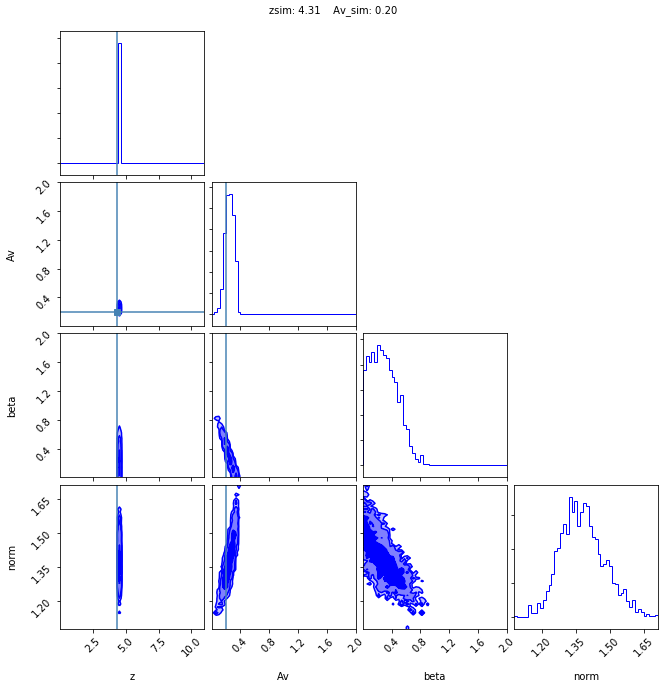


68% - 1 sigma:
z:4.516 +0.016 -0.046 
Av:0.246 +0.063 -0.062 
beta: 0.278 +0.217 -0.184 
norm: 1.373 +0.108 -0.087

95% - 2 sigmas:
z:4.516 +0.031 -0.075 
Av:0.246 +0.098 -0.117 
beta: 0.278 +0.400 -0.266 
norm: 1.373 +0.212 -0.162

99% - 3 sigmas:
z:4.516 +0.080 -0.113 
Av:0.246 +0.119 -0.182 
beta: 0.278 +0.615 -0.277 
norm: 1.373 +0.307 -0.226
median values PDF: 4.516 0.246 0.278 1.373
best fit: 4.511 0.244 0.269 1.345


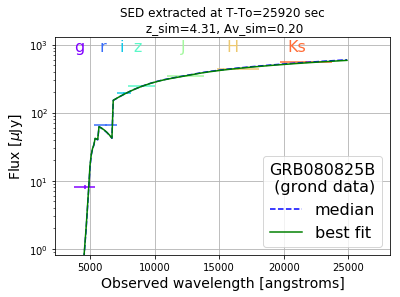



Fit 3/3 	 Object: GRB080906 

z_lit: 2.13   Av_lit: 0.15
Running burn-in
Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02

Best fit:
z: 0.935  Av: 0.007  beta: 0.250  Norm: 0.829     chi2: 0.881

Mean Proba: 2.61e-01

Sum Proba: 5.48e+03
Mean acceptance fraction: 0.464


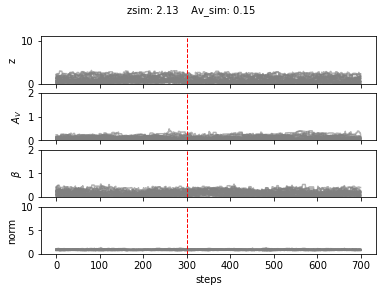

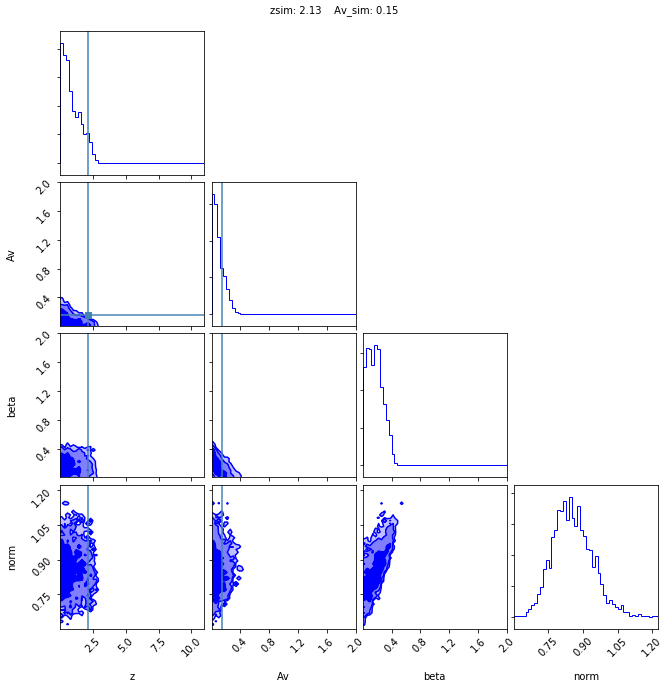


68% - 1 sigma:
z:0.684 +0.968 -0.487 
Av:0.076 +0.101 -0.053 
beta: 0.165 +0.122 -0.108 
norm: 0.848 +0.090 -0.077

95% - 2 sigmas:
z:0.684 +1.700 -0.663 
Av:0.076 +0.203 -0.072 
beta: 0.165 +0.227 -0.154 
norm: 0.848 +0.190 -0.143

99% - 3 sigmas:
z:0.684 +2.069 -0.682 
Av:0.076 +0.315 -0.075 
beta: 0.165 +0.317 -0.164 
norm: 0.848 +0.298 -0.202
median values PDF: 0.684 0.076 0.165 0.848
best fit: 0.935 0.007 0.250 0.829


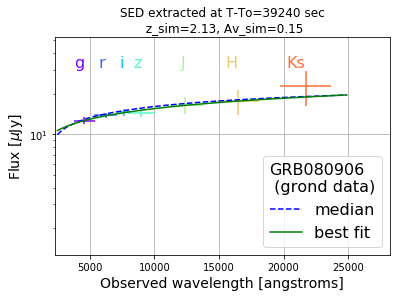


List of GRB not detected: []

None


In [24]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'


photoz.fit(ext_law='smc',Nthreads=4,sampler_type= 'ensemble',nwalkers=30,Nsteps1=300,Nsteps2=1000,nburn=300,
      Host_dust=True,Host_gas=False,MW_dust=False,MW_gas=False,DLA=False,igm_att='Meiksin',
      clean_data=False,plot_all=False,plot_deleted=False,priors=priors)

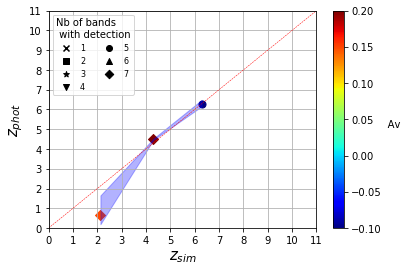

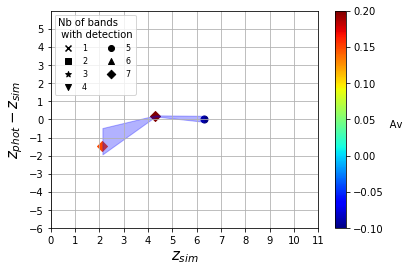

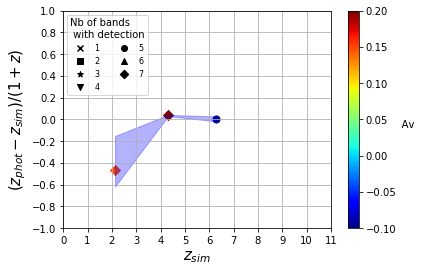

In [25]:
# Plot all redshift estimations together
photoz.plot_zsim_zphot(input_file='best_fits_all_smc',output_suffix='_smc_1sig',sigma=1,
                  input_dir='results/Tuto/MultipleTargets/',output_dir='results/Tuto/MultipleTargets/')